# Keras example
In this Notebook a Keras example from the url below is layed out.

https://www.learnopencv.com/image-classification-using-feedforward-neural-network-in-keras/

In [1]:
from keras.datasets import mnist
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Using TensorFlow backend.


## Load data
To use this for the oceanic images, we need to know in what format the MNIST images are stored.

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


### Some data numbers

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5,1,'Ground Truth : 7')

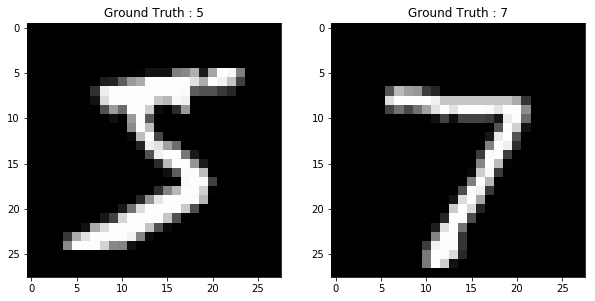

In [3]:
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
 
plt.figure(figsize=[10,5])
 
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

### Convert train data

In [4]:
# Change from matrix to array of dimension 28x28 to array of dimention 784
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
 
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
 
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  5
After conversion to categorical ( one-hot ) :  [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


### Define model and train

In [5]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("\nEvaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s - loss: 0.2695 - acc: 0.9183 - val_loss: 0.1078 - val_acc: 0.9649
Epoch 2/20
60000/60000 [==============================] - 9s - loss: 0.0935 - acc: 0.9713 - val_loss: 0.0844 - val_acc: 0.9727
Epoch 3/20
60000/60000 [==============================] - 11s - loss: 0.0580 - acc: 0.9814 - val_loss: 0.0696 - val_acc: 0.9782
Epoch 4/20
60000/60000 [==============================] - 15s - loss: 0.0398 - acc: 0.9870 - val_loss: 0.0731 - val_acc: 0.9777
Epoch 5/20
60000/60000 [==============================] - 14s - loss: 0.0279 - acc: 0.9907 - val_loss: 0.0917 - val_acc: 0.9767
Epoch 6/20
60000/60000 [==============================] - 12s - loss: 0.0227 - acc: 0.9925 - val_loss: 0.0866 - val_acc: 0.9790
Epoch 7/20
60000/60000 [==============================] - 13s - loss: 0.0163 - acc: 0.9950 - val_loss: 0.0892 - val_acc: 0.9778
Epoch 8/20
60000/60000 [==============================]

### Training plots

Text(0.5,1,'Accuracy Curves')

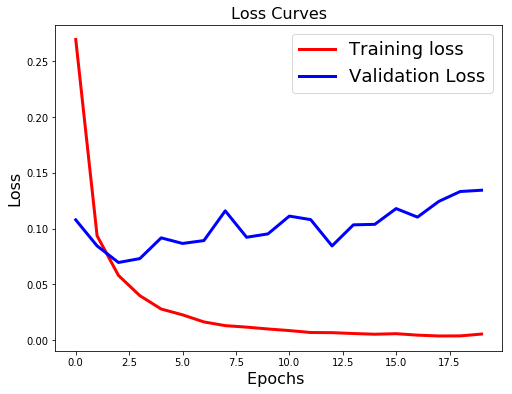

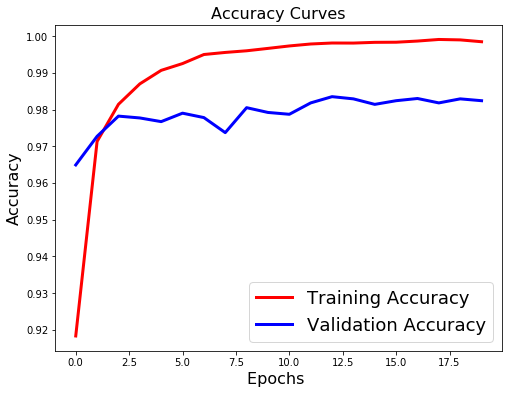

In [6]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

## Some other model

In [7]:
model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_shape=(dimData,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(nClasses, activation='softmax'))

model_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_reg = model_reg.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                            validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s - loss: 0.3719 - acc: 0.8839 - val_loss: 0.1325 - val_acc: 0.9581
Epoch 2/20
60000/60000 [==============================] - 12s - loss: 0.1690 - acc: 0.9495 - val_loss: 0.1051 - val_acc: 0.9682
Epoch 3/20
60000/60000 [==============================] - 11s - loss: 0.1284 - acc: 0.9613 - val_loss: 0.0821 - val_acc: 0.9755
Epoch 4/20
60000/60000 [==============================] - 14s - loss: 0.1102 - acc: 0.9668 - val_loss: 0.0775 - val_acc: 0.9763
Epoch 5/20
60000/60000 [==============================] - 13s - loss: 0.0986 - acc: 0.9710 - val_loss: 0.0699 - val_acc: 0.9795
Epoch 6/20
60000/60000 [==============================] - 11s - loss: 0.0891 - acc: 0.9739 - val_loss: 0.0820 - val_acc: 0.9784
Epoch 7/20
60000/60000 [==============================] - 15s - loss: 0.0827 - acc: 0.9760 - val_loss: 0.0696 - val_acc: 0.9806
Epoch 8/20
60000/60000 [==============================

### Training plots

Text(0.5,1,'Accuracy Curves')

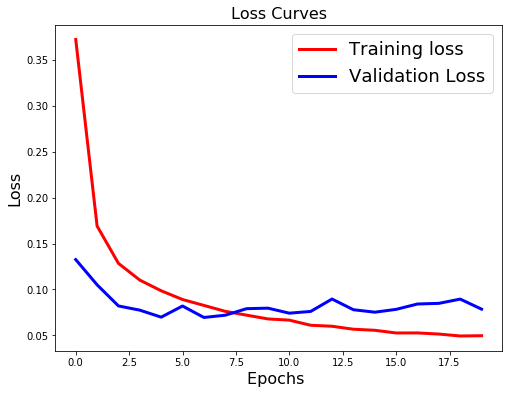

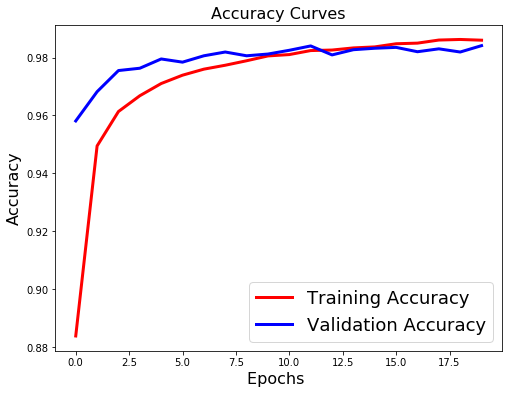

In [8]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['acc'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

## Yeah! Prediction time

In [17]:
# Predict the most likely class
predicted_class = model_reg.predict_classes(test_data[[0],:], verbose=0)[0]
print(predicted_class)

7


In [10]:
# Predict the probabilities for each class 
prediction = model_reg.predict(test_data[[0],:])

In [11]:
for i in range(len(prediction[0])):
    print('{}: {}'.format(i, prediction[0][i]))

0: 7.305181602511562e-20
1: 5.366250711783124e-16
2: 2.702332932078e-12
3: 7.469785900937609e-11
4: 2.72343335945917e-20
5: 3.3143348375810585e-16
6: 2.1328112563311967e-33
7: 1.0
8: 5.162343874820555e-17
9: 7.301972915207955e-10
